In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"E:\Mis Carpetas\Documentos\Data Science\titanic.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
df_copia = df.copy()

In [37]:
df_copia.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"],axis=1,inplace=True)

In [38]:
df_copia

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [39]:
df_copia.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [41]:
df_copia.dropna(subset=["Age"],inplace=True)

In [42]:
df_copia

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [43]:
df_copia.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [44]:
df_copia = df_copia.replace("male",1)
df_copia = df_copia.replace("female",0)

In [45]:
df_copia

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0
...,...,...,...,...
885,0,3,0,39.0
886,0,2,1,27.0
887,1,1,0,19.0
889,1,1,1,26.0


<AxesSubplot:>

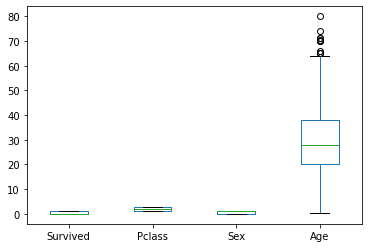

In [46]:
df_copia.plot.box()

<AxesSubplot:xlabel='Survived', ylabel='count'>

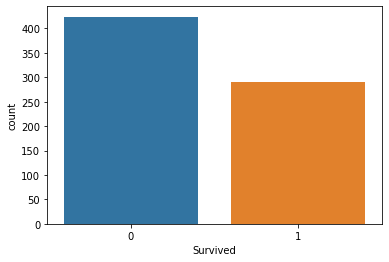

In [47]:
sns.countplot(x="Survived", data=df_copia)

In [48]:
q3, q1 = df_copia.Age.quantile([0.75,0.25])
iqr = q3 - q1

min = q1 - (iqr*1.5)
max = q3 + (iqr*1.5)

df_copia_q = df_copia[(df_copia["Age"]>min) & (df_copia["Age"]<max)]

In [51]:
df_copia.Survived.value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [52]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

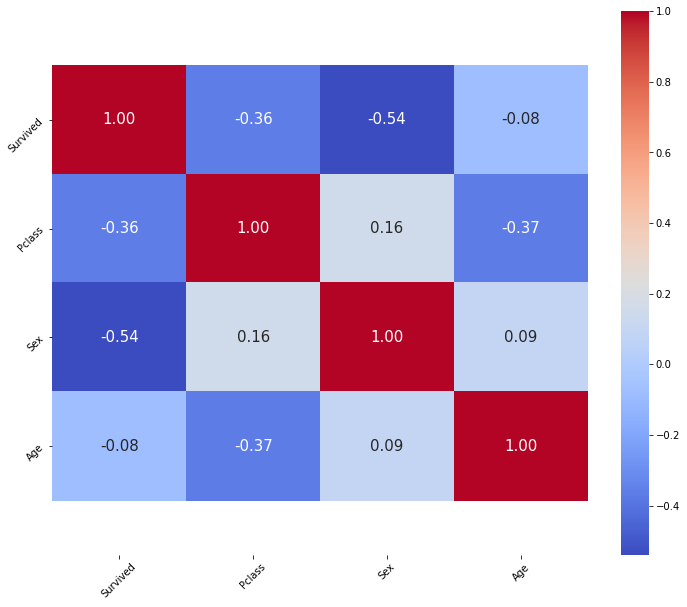

In [53]:
corr = df_copia.corr()
plot_corre_heatmap(corr)

In [54]:
y = df_copia["Survived"]
X = df_copia.drop(columns=["Survived"],axis=1)

In [56]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)

In [62]:
y_test

149    0
407    1
53     1
369    1
818    0
      ..
819    0
164    0
363    0
56     1
136    1
Name: Survived, Length: 143, dtype: int64

In [63]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [65]:
predic_test = tree.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test,predic_test)

In [69]:
test_accuracy

0.7272727272727273

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [71]:
confusion_matrix(y_test,predic_test)

array([[65, 22],
       [17, 39]], dtype=int64)

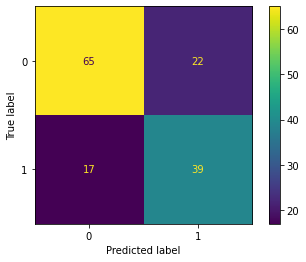

In [72]:
plot_confusion_matrix(tree, X_test, y_test)